In [1]:

from files import examples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.datasets import load_diabetes


# Let us load data from a file

- Quick recap from AP1
- What is data
- Classes
- Objects
- attributes and methods
- Encapsulation
- Informations udtræk


# Exercises Recap

## Exercise 4: Functions in Python (20 minutes)

1. **Create a New Python File:** `functions.py`

2. **Write a Script with Functions:**
  - In the `functions.py` file, type the following code:
    ```python
    def greet(name):
        return f"Hello, {name}!"
    def add_numbers(x, y):
        return x + y
    print(greet("Alice"))
    print(f"Sum: {add_numbers(5, 7)}")
    ```

3. **Run the Script:**
   - Open the integrated terminal in VS Code by clicking on `View` > `Terminal`.
   - In the terminal, navigate to the directory where `functions.py` is saved.
   - Run the script by typing:
    ```sh
    python functions.py
    ```

### Expected Output
When you run the script, you should see the following output in the terminal:
```sh
Hello, Alice! 
Sum: 12
```


In [2]:
# Code it
def greet(name):
    return f"Hello, {name}!"

def add_numbers(x, y):
    return x + y

print(greet("Alice"))
print(f"Sum: {add_numbers(5, 7)}")

Hello, Alice!
Sum: 12


# What is Data?

## Basic data

In [3]:
examples.df_1(N=3)

,hej
0,32
1,97
2,81


## Game Characters

In [4]:
examples.df_2(N=3)


,Unit Name,Type,Normal Attack Power,Max Health,Ultimate Attack Power
0,Child Mech,Naval,293,1554,1040
1,Institution Mech,Infantry,21,283,34
2,Fill Mech,Aircraft,134,869,407


## Patient Data

In [5]:
examples.df_3(N=3)

,Name,DOB,Systolic_BP,Diastolic_BP,EF_Percent
0,Lisa Rivas,1941-09-26,111,109,40
1,Jessica Ray,1942-10-13,149,84,27
2,Diane Gray,1946-01-13,109,62,49


### **Læs data fra fil**

*   **CSV-filer (Comma-Separated Values)**
    *   Meget simpelt og udbredt format til dataudveksling
    *   Almindelig tekstfil – kan åbnes i editorer som `.txt`, `.py`, osv.
*   **Hvorfor bruge CSV?**
    *   Let at læse og skrive med standardværktøjer
    *   Understøttes af næsten alle programmeringssprog og analyseværktøjer
*   **Når data er indlæst i hukommelsen:**
    *   Kan behandles som normale Python-strukturer (lister, arrays)
    *   Mulighed for analyse, beregninger og visualisering

## Bare Bone Fileloading

In [6]:
filename = "files/data_1_rows.csv"
data = []
f = open(filename, 'r')
header = f.readline().strip()


line = f.readline()
while line != "":
    if line != "":
        values = float(line)
        data.append(values)
    line = f.readline().strip()
f.close() # This can be hard to remember

print(f"We loaded {len(data)} rows of data into the variable data")
print(f"The first row often contain the column names, which in this case are {header=}")
N = 5
print(f"First {N} rows") 
for i, row in enumerate(data):
    if i>N:
        break
    print(f" {i}: {row:.3f}")

We loaded 12883 rows of data into the variable data
The first row often contain the column names, which in this case are header='ecg'
First 5 rows
 0: 0.037
 1: -0.005
 2: -0.026
 3: -0.090
 4: 0.033
 5: 0.023


- Uses file open
- Uses file close
    - If anything happens, i.e. program crashes, we still have to close the file (This sucks, and is difficult)

## Pythonic: Removing the need of f.close() using context manager

- Using the keyword `with`, is a method of using a context manager
- Handles f.close() for u
    - Even if program/function fails


In [7]:
filename = "files/data_1_rows.csv"
data = []

with open(filename,'r') as f:
    line = f.readline()

    data = []
    headers = line.strip().split(",")
    line = f.readline()
    while line != "":
        if line != "":
            values = line.split(",")
            data.append(values)
        line = f.readline().strip()

print(f"We loaded {len(data)} rows of data into the variable data")



We loaded 12883 rows of data into the variable data


### **Brug OOP til at læse data**

*   Den nemmeste måde at indlæse data på er ofte at bruge et bibliotek med indbyggede funktioner og metoder.
    *   Dette reducerer kompleksiteten og sparer tid.
*   **Problemet med manuelle loops:**
    *   `while`-løkker og håndtering af fil-læsning kan hurtigt blive uoverskueligt.
    *   Risiko for fejl og gentagelser.
*   **Løsning med objektorienteret programmering (OOP):**
    *   Indkapsler data og funktionalitet i klasser.
    *   Gør koden mere struktureret og genanvendelig.
    *   Nem at udvide med nye funktioner uden at ændre eksisterende logik.

In [8]:
filename = "files/data_1_rows.csv"
data = []
with open(filename,'r') as f:
    datareader = csv.reader(f)
    headers = next(datareader) # Første linje er headers
    header = headers[0]
    for line in datareader:
        data.append(float(line[0]))

N = 5
print(f"First {N} rows") 
for i, row in enumerate(data):
    if i>N:
        break
    print(f" {i}: {row:.3f}")
print(f"The first row often contain the column names, which in this case we have 1 column: {header=}")


First 5 rows
 0: 0.037
 1: -0.005
 2: -0.026
 3: -0.090
 4: 0.033
 5: 0.023
The first row often contain the column names, which in this case we have 1 column: header='ecg'


## Exercise: Load my data 1

I har nu følgende evner:
- Arbejde med arrays i python (fx loop)
- Bruge CSV modulet til at læse data fra en fil til en variabel
- Printe informationer ud til en terminal

### Hvad i skal gøre
1. Lav et program `load_my_data1.py`. 
2. Programmet skal læse data fra filen `files/data1.csv`, som et kommatal (`float`)
3. Skriv de første 10 tal ud fra `data1.csv`
4. Find ud af for mange tal der er i `data1.csv`




## Structs

### C
```c
#include <stdio.h>

struct Shape {
    float d;
};

int main(){
    struct Shape min_variabel1 = {10.0};
    return 0; 
}
```

### Python uses Classes

In [2]:

class MyCircle:
    def __init__(self, r, unit="cm"):
        self.r = r
        self.unit = unit

    # Method to calculate and print area of circle
    def calculate_area(self):
        print("Calculating area...")
        radius= self.r
        area = (radius)**2 * 3.14
        return area

    def print_area(self):
        print("Printing area...")
        radius = self.r
        area = self.calculate_area()
        print(f"Area of a Circle {radius=}{self.unit}: {area}{self.unit}^2")

circle = MyCircle(10.0)

circle.print_area()
    

Printing area...
Calculating area...
Area of a Circle radius=10.0cm: 314.0cm^2


### Using classes to make everything more readable


In [8]:
class CSVDataLoader:
    def __init__(self, filename:str):
        self.filename = filename
        self.data: list|None = None
    def load_data(self) -> list:
        if self.data:
            print("Data was already loaded into memory, so we just reuse it!")
            return self.data
        data = []
        with open(self.filename,'r') as f:
            datareader = csv.reader(f)
            headers = next(datareader) # Første linje er headers
            header = headers[0]
            for line in datareader:
                data.append(float(line[0]))
        self.data = data
        print(f"Data loaded from {self.filename}")
        return data


data1_loader = CSVDataLoader("files/data1.csv")
data1 = dataloader.load_data()
data1 = dataloader.load_data() # We try and reload data

Data was already loaded into memory, so we just reuse it!
Data was already loaded into memory, so we just reuse it!


### **Pandas DataFrame**

*   Der eksterne pakker med avancerede metoder, som gør arbejdet med data lettere og mere effektivt.
*   Et af de mest populære værktøjer er **pandas**, som er bredt anvendt inden for dataanalyse og data science.
  
**Fordele ved pandas:**
*   Gemmer data i en **DataFrame** – en specialiseret datatype designet til struktureret data.
*   Understøtter nem håndtering af store datasæt, filtrering, sortering og beregninger.
*   Integrerer godt med andre Python-biblioteker til analyse og visualisering.

**Hvorfor DataFrame?**
*   Standardformat i data science og maskinlæring.
*   Gør komplekse operationer på data intuitive og hurtige.

In [9]:
filename = "files/data_2_rows.csv" # Her er der 2 columns
df = pd.read_csv(filename)
headers = df.columns
df.head(5)
print(type(df.columns))  # inspect if tuples appear
print( df.columns.tolist())

<class 'pandas.core.indexes.base.Index'>
['time', 'ecg']


Hvis man gerne vil have lavet en colonne i en DataFrame om til en almindelig liste:

In [10]:
# For at få en colonne af data som fx en liste, kan man skrive følgende
column_as_list = df["ecg"].to_list()
column_as_list[:5]

[0.0365252590330205,
 -0.0045717351674537,
 -0.0256373411738366,
 -0.0896959090111428,
 0.0334712016541785]

# **Visualisering af data**

For at forstå og analysere data er det vigtigt at inspicere dem visuelt.  
En af de mest effektive metoder er at bruge grafer og plots.

*   **Hvorfor visualisere?**
    *   Afslører mønstre, trends og outliers
    *   Gør komplekse data mere intuitive

*   **Typiske værktøjer**
    *   **Matplotlib** – standardbibliotek til 2D-plot (Og det vi kommer til at benytte i dette kursus)
    *   **Seaborn** – avanceret statistik og flot design
    *   **Plotly** – interaktive plots


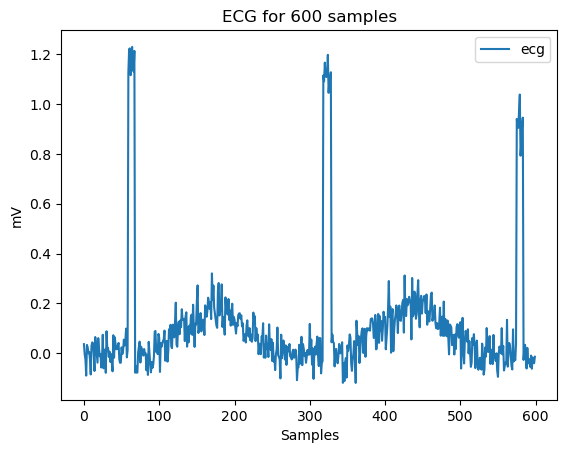

In [11]:
N = 600
plt.plot(data[:N], label=header)
plt.legend()
plt.xlabel("Samples")
plt.ylabel("mV")
plt.title(f"{header.upper()} for {N} samples")
plt.show()

Der er mange pakker til at vise data, og arbejde med data.
- `matplotlib` er det absolut mest udbredte

### **Arbejde med flere datasæt**

Når man vil håndtere flere datasæt samtidigt, fx sammenligne signaler eller have dataset-specifikke indstillinger:

*   **Kompleksitet i globalt scope**  
    Variabler og indstillinger bliver hurtigt uoverskuelige.

*   **Risiko for fejl**  
    Dataset-specifikke settings kan nemt blive overskrevet.

*   **Manglende struktur**  
    Svært at holde styr på relationen mellem data og tilhørende konfiguration.

*   **Gentagelse af kode**  
    Ofte nødvendig uden en god struktur – kan føre til vedligeholdelsesproblemer.


ECG @ 300 Hz   : len(dataa)=600, og dataa_samplerate=300Hz
ECG @ 150 Hz   : len(datab)=300, og datab_samplerate=150Hz


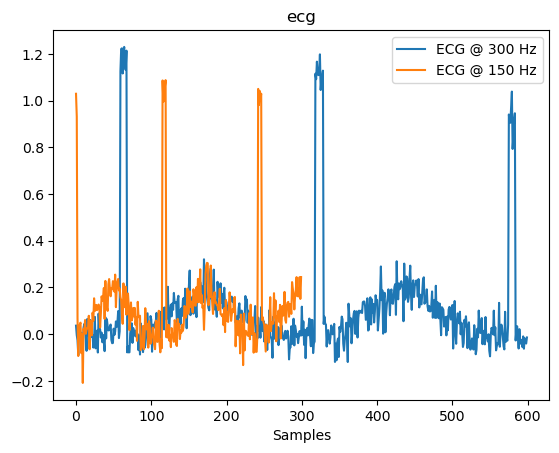

In [12]:
import numpy as np
import pandas as pd
dataa_samplerate = 300
datab_samplerate = 150
dataa = pd.read_csv("files/ECG_300Hz.csv")["ecg"].to_list()
datab = pd.read_csv("files/ECG_150Hz.csv")["ecg"].to_list()
labela = f'ECG @ {dataa_samplerate} Hz'
labelb = f'ECG @ {datab_samplerate} Hz'
print(f"{labela:15}: {len(dataa)=}, og {dataa_samplerate=}Hz")
print(f"{labelb:15}: {len(datab)=}, og {datab_samplerate=}Hz")

plt.plot(dataa,label=labela)
plt.plot(datab,label=labelb)
plt.title(header)
plt.legend()
plt.xlabel("Samples")
plt.show()

Dette er en fin løsning til at vise meget simpelt data.

Hvis man rammer ind i at skal gøre dette mange gange, kan et program exploderer.
- Svært at overskue
- Svært at fejlfinde
- Meget repetitiv kode

For eksempel, hvorfor er det at dette plot (fra samme datasæt) ikke vise hjertecyklusser

## Classes

*   **Organiseret kode**  
    Samler data (attributter) og funktionalitet (metoder) i én struktur.
*   **Genbrug og vedligeholdelse**  
    Én klasse kan bruges flere steder, og ændringer sker ét sted.
*   **Skalerbarhed**  
    Nem at udvide med nye funktioner uden at ændre eksisterende kode.
*   **Indkapsling**  
    Skjuler interne detaljer og giver en klar interface til brugeren.
*   **Bedre læsbarhed**  
    Gør komplekse systemer mere overskuelige og forståelige.



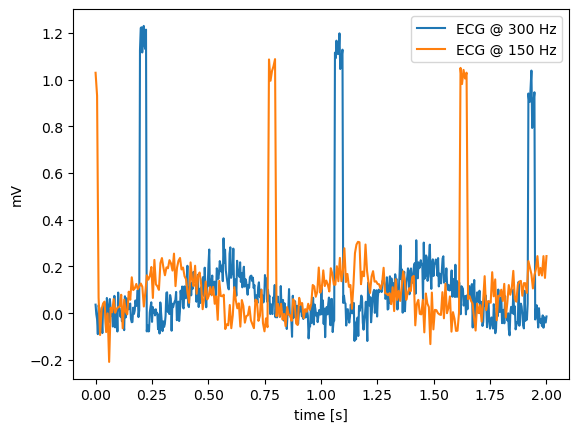

In [13]:
class Signal:
    def __init__(self,data:list, fs:float, label:str):
        # Attributes
        self.data = data
        self.fs = fs
        self.time = np.linspace(0,len(data)/fs,len(data))
        self.label = label

    # methods
    def plot(self, ax = None):
        """ Method to plot data """
        if not ax:
            ax = plt.subplot(1,1,1)
        ax.plot(self.time, self.data, label=self.label)
        return ax

# Normal Function
def finalize_figure():
    """ This function simply sets up current figure with the correct visual settings"""
    plt.legend()
    plt.xlabel("time [s]")
    plt.ylabel("mV")
    plt.show()
    
# Definer 2 sigler ud fra dataa og datab
signal_a = Signal(data=dataa, fs=dataa_samplerate, label=labela)
signal_b = Signal(data=datab, fs=datab_samplerate, label=labelb)

# Plot figurerne oven i hinanden, ved at bruge en figurehandle
ax = plt.subplot(1,1,1)
signal_a.plot(ax)
signal_b.plot(ax)
finalize_figure()

# Exercise: Class

In [14]:
examples.df_3()

,Name,DOB,Systolic_BP,Diastolic_BP,EF_Percent
0,Mr. Tristan Thornton,2015-09-23,90,61,61
1,Johnathan Taylor,2017-05-31,175,107,42
2,Andrew Coleman,1964-11-13,177,86,65


**Du ved nu**:
- Hvordan man laver en class med en attributter via `def __init__(self, ...)`
- hvordan man laver en method
- Hvordan man istancierer et objekt fra en class
- Hvordan man laver en liste

**Din opgave**:
1. Opret et nyt Python-program ```person1.py```.
2. Lav en class ```PersonInfo```
    -  med følgende attributter: ```name, dob, systolic_bp, diastolic_bp, ef_percent```
    -  med en method `show_information`, som printer informationerne ud fra PersonInfo classen
3. Lav en liste af PersonInfo informationerne i tabellen ovenover (du skal bare skrive de tal her ind).
4. Skrive patient informationerne ud for hver patient i listen.


## Answer 1

In [15]:
# Answer 1
class PersonInfo:
    def __init__(self, name, dob, systolic, diastolic, ef_percent):
        self.name = name
        self.dob = dob
        self.systolic = systolic
        self.diastolic = diastolic
        self.ef_percent = ef_percent

    def show_information(self):
        print(f"Name: {self.name}, date of birth: {self.dob}, Distolic: {self.diastolic}, ...")

person1 = PersonInfo(name="Martin", dob="17071987", systolic = 130, diastolic = 80, ef_percent = 55)

person1.show_information()

Name: Martin, date of birth: 17071987, Distolic: 80, ...


### **Indkapsling (Encapsulation)**

Indkapsling betyder at samle **data (attributter)** og **metoder (funktioner)** i én enhed (en klasse) og styre adgangen til den interne tilstand for at beskytte data.

**Nøglepunkter:**
*   **Skjul intern tilstand** for at undgå direkte ændringer udefra.
*   **Beskyttede attributter** (`_x` i Python)
    *   Beregnet til brug internt og i underklasser.
    *   Synlige udefra, men bør ikke ændres direkte.
*   **Private attributter** (`__x` i Python)
    *   Skjult for kode uden for klassen og underklasser.
*   **Metoder**
    *   Funktioner, der hører til klassen og arbejder på dens data.



In [48]:

class PersonInfo2:
    def __init__(self, name, dob, systolic, diastolic, ef_percent):
        self.__name = name
        self.__dob = dob
        self.__systolic = systolic
        self.__diastolic = diastolic
        self.__ef_percent = ef_percent
    def show_information(self):
        print(f"Name: {self.__name}, date of birth: {self.__dob}, Distolic: {self.__diastolic}, ...")

    # Setter og Getter
    def set_diastolic(self, diastolic):
        self.__diastolic = diastolic
    def get_diastolic(self):
        return self.__diastolic

person_1 = PersonInfo(name="Martin", dob="17071987", systolic = 130, diastolic = 80, ef_percent = 55)
person_1.diastolic= 130
person_1.show_information()


person_2 = PersonInfo2(name="Martin", dob="17071987", systolic = 130, diastolic = 80, ef_percent = 55)
# Dette kan man ikke!!!
person_2.__diastolic= 200 # Du tror du ændre __diastolic, den melder ikke fejl. Men det gør du IKKE!
person_2.show_information()
        


Name: Martin, date of birth: 17071987, Distolic: 130, ...
Name: Martin, date of birth: 17071987, Distolic: 80, ...


## Exercise: Fordele og Ulemper ved Klasser og Indkapsling

Snak om hvad fordele og ulemper er ved classes og encapsulation

# Informations Udtræk

- Man kan benytte classes når man ønsker at arbejde med noget specifikt data.
- Dette gør at man reducerer risikoen for at overskive variabler, og fjerner komplexitet fra brugeren.
- Et eksempel på informations udtræk er at finde peaks i et datasæt.

Herunder er der noget pseudokode, som i allerede har lavet i C på jeres ESP32.


### **Pseudocode: Peak Detection**

```
INITIALIZE:
    thr ← initial_threshold          # main threshold for peak detection
    record ← 0                       # current peak candidate value
    recordt ← 0                      # index of current peak candidate
    indecies ← []                       # list to store detected peak positions
    t ← 0                            # sample index

FOR each value in signal:
    IF value > thr DO
        # Above threshold: update peak candidate if higher than previous
        IF value > record DO
            record ← value
            recordt ← t
        ENDIF
        
    ELSE DO
        # Below threshold: check if we had a peak candidate AND signal dropped below (thr)
        IF record > 0 DO
            # Confirm peak and store its position
            ADD recordt TO indecies
            # Reset candidate
            record ← 0
            recordt ← 0
        ENDIF
        
    ENDIF
    t ← t + 1
    
END FOR

OUTPUT indecies
```


In [49]:
class Signal2:
    def __init__(self,data:list, fs:float, label:str):
        # Attributes
        self.data: np.ndarray = np.array(data)
        self.fs = fs
        self.time: np.ndarray = np.linspace(0,len(data)/fs,len(data))
        self.label = label

    # methods
    def plot(self, ax = None):
        """ Method to plot data """
        if not ax:
            ax = plt.subplot(1,1,1)
        ax.plot(self.time, self.data, label=self.label)
        return ax
        
    def scatter(self, points: list[int], ax = None):
        """ Method to plot data """
        x = self.time[points] # Hvis self.time er af typen list, skal man skrive x = [self.time[i] for i in points]
        y = self.data[points] # Hvis self.data er af typen list, skal man skrive x = [self.data[i] for i in points]
        if not ax:
            ax = plt.subplot(1,1,1)
        ax.scatter(x, y, label=f"{self.label} peaks",color='r')
        return ax
        
    # Find peaks
    def find_peaks(self, threshold:float):
        raise NotImplementedError("Implementer Pseudokoden her!") # <<== Den her kommer i til at se, når jeg vil have jer til at gøre noget.

# Definer signal a
signal2_a = Signal2(data=dataa, fs=dataa_samplerate, label=labela)
peaks_indecies_a = signal2_a.find_peaks(0.5)

# Plot figurerne oven i hinanden, ved at bruge en figurehandle
ax = plt.subplot(1,1,1)
signal2_a.plot(ax)
signal2_a.scatter(peaks_indecies_a, ax)
finalize_figure()

NotImplementedError: Implementer Pseudokoden!


# Fordele og Ulemper ved Klasser og Indkapsling

## Fordele
- **Modularitet:** Koden opdeles i logiske enheder → lettere vedligeholdelse.
- **Genbrug:** Klasser kan genbruges i andre projekter.
- **Data-beskyttelse:** Indkapsling sikrer kontrolleret adgang til data.
- **Abstraktion:** Skjuler kompleksitet og giver et klart interface.
- **Skalerbarhed:** Nem at udvide uden at bryde eksisterende kode.

## Ulemper
- **Overhead:** Mere komplekst end nødvendigt for små scripts.
- **Performance:** Kan være langsommere end procedurale løsninger.
- **Overdesign:** Risiko for for mange klasser og abstraktioner.


# Exercises
*Hint:*
- Brug debuggeren når du sidder fast, og hvis i ikke forstår hvorfor jeres resultater ikke er som forventet.
- Brug dine medstuderende sammen med debuggeren til at identificerer problemer i jeres kode.
  
  

## Exercise: Finde Hjertefrekvens og plot det over tid

Du ved på nuværende tidspunkt:
- Hvordan man importerer data fra en fil
- Hvordan man laver en class
- Hvordan man finder peaks i et signal
- Hvordan man plotter data

Yderligere ved du fra tidligere semestre hvordan man udregner heartrate hvis du har tidsforskellen $\Delta t$ mellem to hjerteslag 
$$
\text{heartrate} = \frac{60}{\Delta t}
$$


### Opgave:
1. Opret en ny Python-fil `extract_heartrate.py`
2. Lav en class HeartRateData, som tager en filepath og sampling frekvens ($f_s$) som input, og loader data fra filen og gemmer en i en attribute/medlemsvariabel.
3. Lav en metode `calculate_heartrate(threshold)`, som returnerer heartrate for alle beats i et ekg signal, samt tidspunkterne for hvert beat.
  
   *Hints*:  
   $$\Delta t_i = (beat[i] - beat[i-1]) \cdot f_s$$
   $$ t_i = i  / f_s $$
5. Analyser og plot heartrate over tid for filen `files/data_1_row.csv`, data er optaget med 300Hz


## Exercise: Load Data
Du ved på nuværende tidspunkt:
* Hvordan man laver en variable, og hvordan man laver en string
* Hvordan man loader data fra en fil
* Hvordan man printer tekst ud til terminalen





## Exercise: Show data